# Ensemble classification and hyperparameter tuning
## Preparations

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

In [31]:
# Read the previously used liver spectroscopy data set
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)

['collagen' 'glycogen' 'lipids' 'DNA']


,1801,1797,1793,1789,1785,1781,1778,1774,1770,1766,...,937,933,929,925,921,917,914,910,906,902
68,0.128,0.128,0.129,0.129,0.129,0.130,0.131,0.132,0.134,0.135,...,0.229,0.229,0.228,0.227,0.226,0.224,0.220,0.218,0.216,0.215
707,0.146,0.147,0.148,0.148,0.149,0.150,0.151,0.152,0.154,0.158,...,0.213,0.213,0.213,0.213,0.213,0.212,0.210,0.208,0.206,0.204
205,0.115,0.115,0.116,0.116,0.115,0.116,0.117,0.120,0.122,0.122,...,0.227,0.228,0.228,0.226,0.222,0.218,0.214,0.209,0.205,0.202
642,0.143,0.145,0.147,0.147,0.147,0.148,0.149,0.153,0.158,0.160,...,0.184,0.184,0.184,0.183,0.182,0.181,0.180,0.178,0.175,0.174
403,0.088,0.089,0.090,0.090,0.089,0.090,0.091,0.095,0.097,0.098,...,0.241,0.244,0.245,0.244,0.243,0.241,0.238,0.235,0.231,0.229
193,0.147,0.148,0.149,0.150,0.149,0.150,0.151,0.153,0.154,0.154,...,0.199,0.199,0.199,0.198,0.197,0.196,0.194,0.192,0.190,0.189
172,0.148,0.148,0.149,0.150,0.149,0.151,0.151,0.153,0.154,0.155,...,0.185,0.184,0.184,0.183,0.182,0.180,0.177,0.175,0.173,0.172
480,0.126,0.126,0.126,0.125,0.125,0.124,0.123,0.124,0.127,0.132,...,0.195,0.193,0.192,0.190,0.189,0.187,0.184,0.180,0.177,0.174
225,0.116,0.117,0.116,0.117,0.118,0.119,0.119,0.120,0.122,0.125,...,0.227,0.229,0.229,0.227,0.224,0.221,0.217,0.213,0.208,0.205
129,0.130,0.131,0.132,0.133,0.133,0.134,0.135,0.137,0.139,0.141,...,0.207,0.207,0.205,0.204,0.202,0.199,0.197,0.193,0.191,0.188


<Axes: >

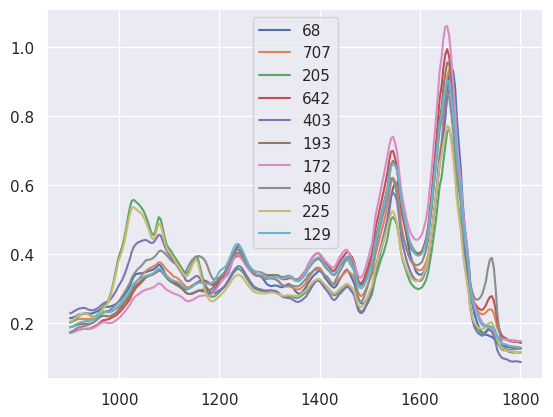

In [32]:
# Parse the column index to integer wavelengths using a lambda-function
wl=D.columns[:-1].map(lambda x: int(float(x)))

# Separate the numerical data from liver spectroscopy to design matrix X
X=D.iloc[:,:-1]

# Assign numerical values to column names, so that the plot is prettier
X.columns=wl

# Print and plot 10 randomly selected samples from the data
sample=X.sample(10)
display(sample)
sample.T.plot()

## Task 1: Apply the extratrees classifier

Import Extratrees classifier from `sklearn.ensemble`, instantiate a classifier with following parameters. 
 - number of estimators = 10
 - maximum depth = 3
 - minimum samples split = 2

When the predictor is trained with these ad-hoc parameters, study its performance with following 5 methods

 1. Styled confusion matrix: `display(pd.crosstab(....))`
 3. Accuracy: `metrics.accuracy_score(...)`
 4. More accuracy measures: `metrics.classification_report(...)`
 5. Check accuracy with cross validation: `cross_val_score(...)` using three-fold cross validation
 6. Calculate the mean of cross validation results over all folds

You can check what recall and f1-score means from SKlearn documentation, [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) and Wikipedia [F-score](https://en.wikipedia.org/wiki/F-score) pages.

You can import [Extratrees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) Import also [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) from sklearn since it contains all important classifier metrices. And import cross_val_score from [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| classifier, estimator | `est` |
| Accuracy | `accuracy` |
| Cross val accuracy | `cv_accuracy` |
| Confusion matrix, made with crosstab | `cm` |

In [33]:
# YOUR CODE HERE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

est = ExtraTreesClassifier(n_estimators=10, max_depth=3, min_samples_split=2, random_state=42)
est.fit(X, types)
# Predict on the training data
y_pred = est.predict(X)

# 1. Confusion matrix
cm = pd.crosstab(types, y_pred, rownames=['Actual'], colnames=['Predicted'])
display(cm)

# 2. Accuracy
accuracy = metrics.accuracy_score(types, y_pred)
print(f"Accuracy: {accuracy}")

# 3. Classification report
print(metrics.classification_report(types, y_pred))

# 4. Cross-validation score
cv_accuracy = cross_val_score(est, X, types, cv=5)
print(f"Cross-validation scores: {cv_accuracy}")

# 5. Mean of cross-validation results
print(f"Mean cross-validation accuracy: {cv_accuracy.mean()}")

Predicted,DNA,collagen,glycogen,lipids
Actual,,,,
DNA,82,17,0,11
collagen,1,194,0,0
glycogen,0,3,209,0
lipids,6,0,0,208


Accuracy: 0.948016415868673
              precision    recall  f1-score   support

         DNA       0.92      0.75      0.82       110
    collagen       0.91      0.99      0.95       195
    glycogen       1.00      0.99      0.99       212
      lipids       0.95      0.97      0.96       214

    accuracy                           0.95       731
   macro avg       0.94      0.92      0.93       731
weighted avg       0.95      0.95      0.95       731

Cross-validation scores: [0.89795918 0.97945205 0.93835616 0.93835616 0.89726027]
Mean cross-validation accuracy: 0.9302767682415432


In [34]:
import sklearn
errorfound=False
require=('est', 'accuracy', 'cv_accuracy', 'cm')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

if type(est) != sklearn.ensemble.ExtraTreesClassifier:
    print("The classifier is of wrong type")
    errorfound=1
if not errorfound:
    print("No errrors found this far, your code may work :)")


No errrors found this far, your code may work :)


## Task 2, optimize the classifier

Lets try now to find optimal parameters controlling the model (=hyperparameters) for the classifier with `gridSearchCV`. Search the parameters:
 - `n_estimators`
 - `max_depth` and
 - `min_samples_split`

Use the previously used extratrees classifier as a starting point

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Tunable parameters structure | `params` |
| Grid search object | `cv_est` |

In [35]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [10, 60, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
cv_est = GridSearchCV(est, params, cv=5, n_jobs=-1)
cv_est.fit(X, types)
est_opt = cv_est.best_estimator_
print("Best parameters:", cv_est.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
errorfound=False
require=('params', 'cv_est')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        

## Task 3

Having trained your estimator, check what where the optimal parameters, and compare the CV-accuracy with the previous model and plot the confusion matrix with crosstab as well. Did it improve?

Notice that you will find the optimised estimator as `cv_est.best_estimator_`, and you can see all its parameters with `est_opt.get_params()`.

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Optimal, tuned predictor | `est_opt` |
| Cross validation accuracy | `cv_opt` |
| Confusion matrix  | `cm_opt` |

In [37]:
# YOUR CODE HERE
est_opt = cv_est.best_estimator_
print("Best parameters:", cv_est.best_params_)

cv_opt = cross_val_score(est_opt, X, types, cv=5)
print(f"Optimized cross-validation accuracy: {cv_opt.mean()}")
print(f"Previous cross-validation accuracy: {cv_accuracy.mean()}")

y_pred_opt = est_opt.predict(X)
cm_opt = pd.crosstab(types, y_pred_opt, rownames=['Actual'], colnames=['Predicted'])
display(cm_opt)

if cv_opt.mean() > cv_accuracy.mean():
    print("The optimized model shows improvement.")
else:
    print("The optimized model does not show improvement.")

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Optimized cross-validation accuracy: 0.971372658652502
Previous cross-validation accuracy: 0.9302767682415432


Predicted,DNA,collagen,glycogen,lipids
Actual,,,,
DNA,102,7,0,1
collagen,2,193,0,0
glycogen,0,0,212,0
lipids,2,0,0,212


The optimized model shows improvement.


In [38]:
errorfound=False
require=('est_opt', 'cv_opt', 'cm_opt')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        